<a href="https://colab.research.google.com/github/aakanksha32173/ML-Files/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [5]:
#Importing the Boston HousePrice dataset
House_Price_DataSet=sklearn.datasets.fetch_california_housing()
print(House_Price_DataSet)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [10]:
housePrice=pd.DataFrame(House_Price_DataSet.data,columns=House_Price_DataSet.feature_names)

In [11]:
housePrice.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [14]:
#adding target_column with housePrice
housePrice['price']=House_Price_DataSet.target

In [15]:
housePrice.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [16]:
housePrice.shape

(20640, 9)

In [18]:
#check for missing values
housePrice.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [19]:
housePrice.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [23]:
#uncderstanding the correlation 
#positive and negative
correlation =housePrice.corr()

<Axes: >

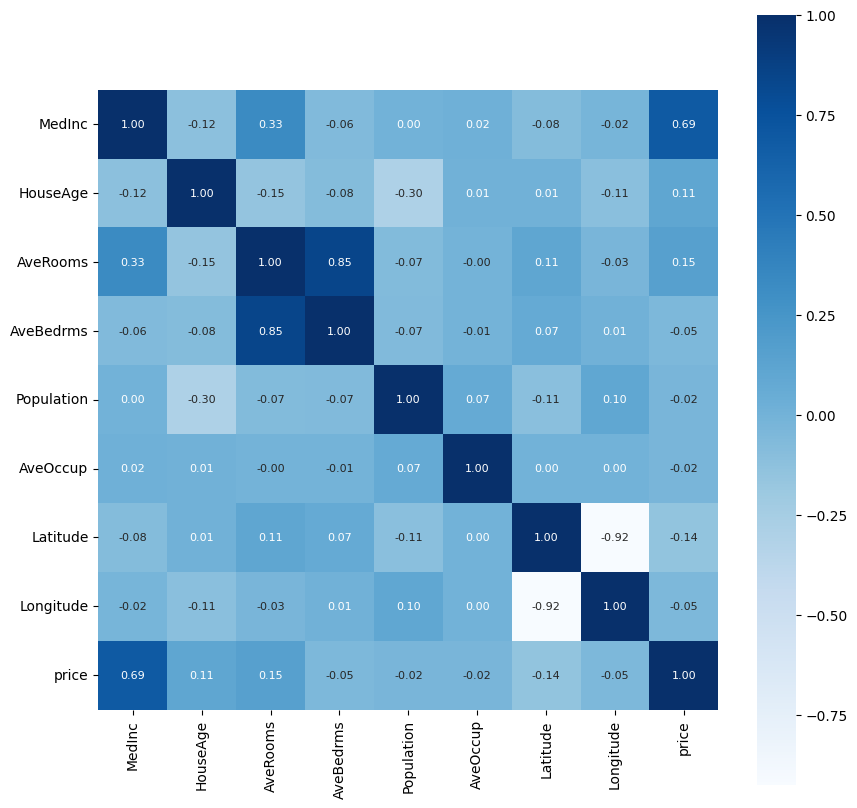

In [32]:
#constructing a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':8},cmap='Blues')

In [33]:
#splitting the data and target
X=housePrice.drop(columns='price',axis=1)
Y=housePrice['price']

In [34]:
X
Y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: price, Length: 20640, dtype: float64

In [39]:
#splitting into training and test data
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=2)

In [40]:
xtrain.shape
ytrain.shape


(16512,)

In [41]:
#ModelTraining
#XGBoost Regressor
model=XGBRegressor()
#training the model with xtrain
model.fit(xtrain,ytrain)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [42]:
#Prediction on testing data
Prediction=model.predict(xtest)

In [51]:
#Prediction on training data
Prediction=model.predict(xtrain)
score_1=metrics.r2_score(ytrain,Prediction)
score_1
score_2=metrics.mean_absolute_error(ytrain,Prediction)
score_2

0.1919170860794262

In [43]:
print(Prediction)

[2.787383  1.9628428 0.782536  ... 1.5060123 0.8763797 1.9317917]


In [45]:
#R squared error
score_1=metrics.r2_score(ytest,Prediction)
score_1

0.8412904408180302

In [48]:
score_2=metrics.mean_absolute_error(ytest,Prediction)
score_2

0.30753655785801337

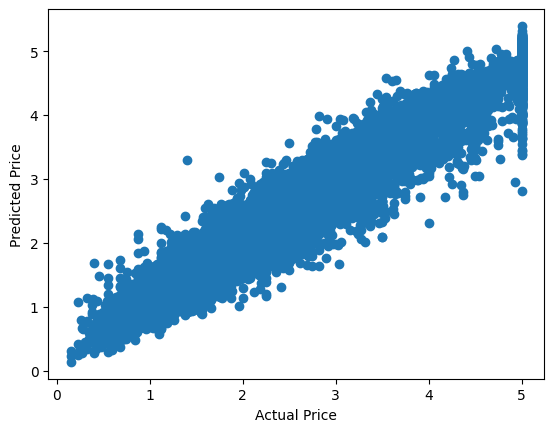

In [53]:
plt.scatter(ytrain,Prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()